Here we display the skymaps of the depth+ebv limited survey footprint for some of the new cadences.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import os
import pandas as pd
%matplotlib inline

In [2]:
import time
import numpy as np
import healpy as hp
import os
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles

In [3]:
%matplotlib inline

In [4]:
fontsize = 18
rcparams = {}
rcparams['figure.figsize'] = (10, 6)
rcparams['axes.labelsize'] = fontsize
rcparams['legend.fontsize'] = fontsize-4
rcparams['axes.titlesize'] = fontsize
rcparams['axes.linewidth'] = 2
rcparams['axes.grid'] = True
for axis in ['x', 'y']:
    rcparams['%stick.labelsize'%axis] = fontsize-2
    rcparams['%stick.direction'%axis] = 'in'
    rcparams['%stick.major.size'%axis] = 5.5
    rcparams['%stick.minor.size'%axis] =  3.5
    rcparams['%stick.major.width'%axis] = 2
    rcparams['%stick.minor.width'%axis] = 1.5
rcparams['xtick.top'] = True
rcparams['ytick.right'] = True
for key in rcparams: mpl.rcParams[key] = rcparams[key]

In [5]:
def get_area(pix_arr, nside):
    return len(pix_arr) * hp.nside2pixarea(nside=nside, degrees=True)

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes


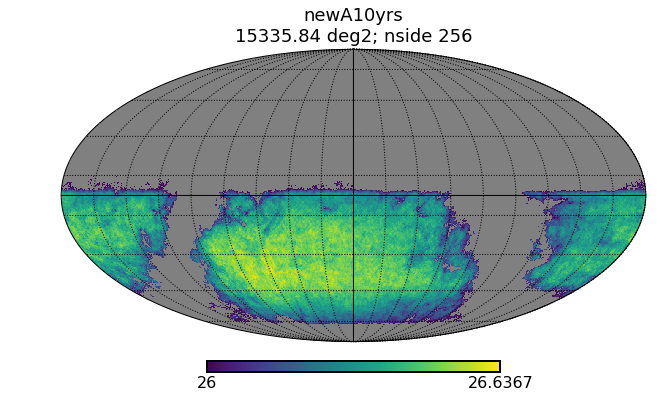

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes


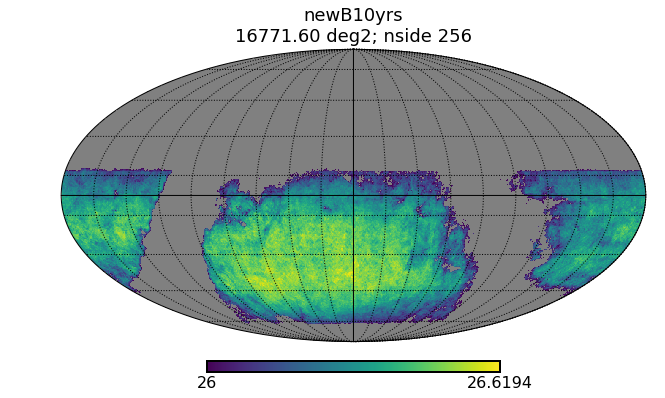

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes


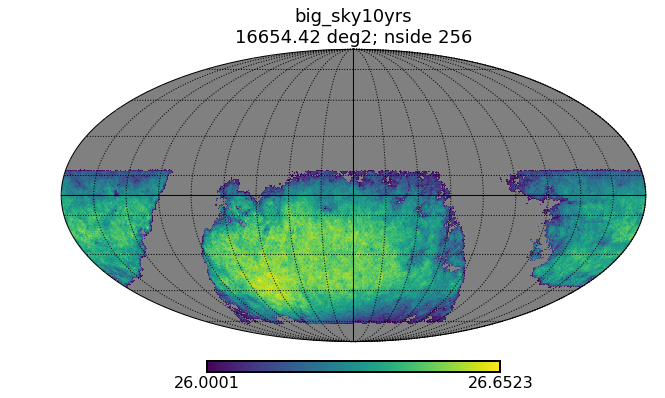

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes


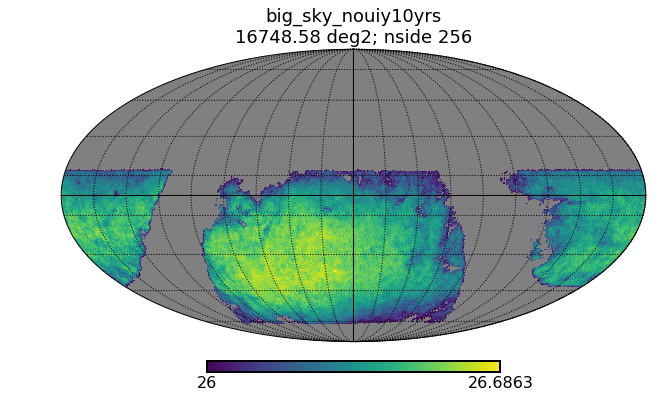

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes


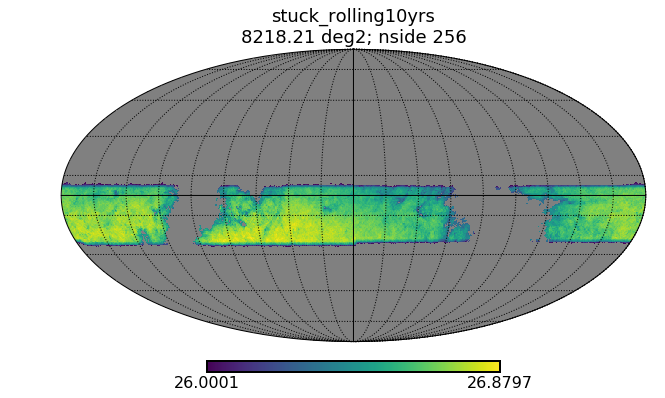

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes


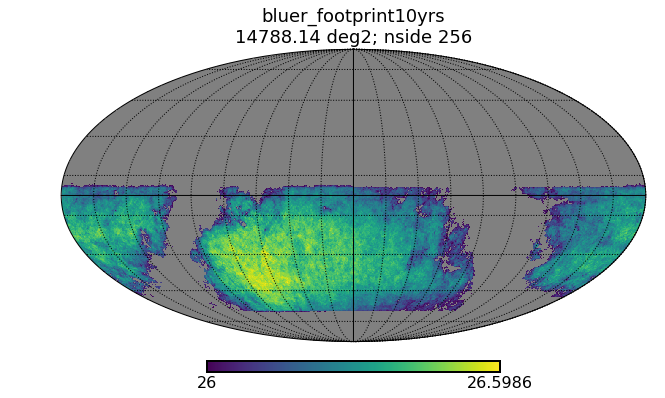

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes


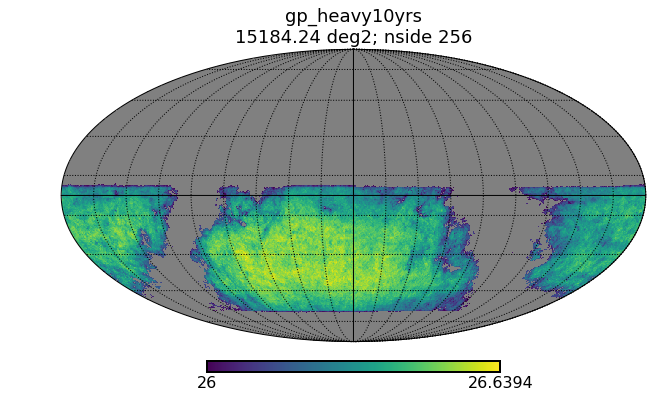

In [6]:
for db in [ 'newA10yrs',  'newB10yrs', 'big_sky10yrs', 'big_sky_nouiy10yrs', \
           'stuck_rolling10yrs','bluer_footprint10yrs', 'gp_heavy10yrs']:
    fname = '/global/cscratch1/sd/awan/lsst_output/post_wp_output/bundle_data/depth_in_eg_%s_i-band_limi26.0_nodither_nside256.npz' % db

    mB = metricBundles.createEmptyMetricBundle()
    mB.read(fname)
    test_bundle = mB
    
    pix_list = np.where(test_bundle.metricValues.mask == False)[0]
    nside = 256
    title = '%s\n%.2f deg2; nside %s'%(db, get_area(pix_list, nside),
                                       nside)

    hp.mollview(test_bundle.metricValues, flip='astro', rot=(0,0,0), title=title)
    hp.graticule(dpar=20, dmer=20, verbose=False)
    plt.show()